### SOURCE

In [39]:
# Source code: https://machinelearningmastery.com/machine-learning-in-python-step-by-step/
# Additional list of ML methods:
## https://www.analyticsvidhya.com/blog/2017/09/common-machine-learning-algorithms/
## https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html


### IMPORT LIBRARY

In [40]:
# Compare algorithms
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


### INPUT DATASET

In [41]:
url = "/home/jos/tf_lab/Ultralight-SimplePose/generator_dataset/dataset_file_5.csv"
data_title = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','res']

dataset = read_csv(url, names=data_title)
# Split-out validation dataset
array = dataset.values

X = array[:,[5,6,11,12,13,14,15,16]]
y = array[:,len(data_title)-1]
data_title = ['5','6','11','12','13','14','15','16','res']
# train_size?
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, train_size=0.9999, shuffle=True)



In [42]:
print(X_train)

[[0.538651 0.483628 0.28452  ... 0.452691 0.592162 0.66182 ]
 [0.5199   0.483651 0.284523 ... 0.465388 0.600193 0.652812]
 [0.596767 0.568739 0.109906 ... 0.462553 0.855831 0.859459]
 ...
 [0.534124 0.579558 0.119111 ... 0.454051 0.761631 0.848585]
 [0.480945 0.521212 0.113094 ... 0.307731 0.800766 0.854227]
 [0.400001 0.315817 0.530264 ... 0.36269  0.658853 0.573295]]


In [43]:
print(X_validation)

[[0.644263 0.576595 0.207694 0.110253 0.350479 0.422962 0.840704 0.854296]]


In [44]:
print(Y_train)

[1. 1. 2. 1. 1. 1. 2. 3. 1. 2. 2. 2. 1. 3. 3. 2. 2. 1. 1. 1. 1. 1. 3. 2.
 2. 3. 2. 3. 2. 1. 1. 1. 2. 2. 2. 3. 2. 3. 2. 3. 3. 2. 2. 3. 2. 1. 2. 1.
 2. 3. 2. 3. 1. 2. 1. 1. 1. 1. 2. 2. 2. 3. 3. 3. 1. 3. 2. 2. 2. 3. 2. 1.
 1. 1. 2. 2. 2. 3. 1. 3. 2. 1. 3. 2. 1. 1. 2. 3. 1. 1. 2. 2. 3. 2. 1. 3.
 1. 3. 3. 3. 2. 2. 3. 2. 1. 2. 1. 1. 2. 3. 1. 2. 3. 2. 1. 2. 3. 1. 2. 1.
 2. 3. 2. 3. 2. 2. 3. 3. 1. 3. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 2. 2.
 1. 1. 1. 2. 3. 2. 3. 2. 1. 1. 1. 1. 1. 2. 1. 3. 1. 2. 2. 2. 1. 3. 3. 1.
 2. 2. 3. 1. 2. 2. 3. 1. 2. 2. 3. 2. 2. 3. 3. 1. 1. 3. 2. 2. 3. 2. 3. 3.
 1. 1. 2. 2. 1. 1. 1. 3. 1. 3. 1. 1. 2. 3. 2. 1. 1. 1. 1. 3. 2. 1. 3. 3.
 1. 1. 2. 1. 2. 2. 1. 1. 1. 1. 2. 1. 3. 2. 1. 2. 2. 3. 2. 2. 1. 1. 2. 3.
 1. 2. 2. 3. 3. 2. 1. 3. 2. 1. 3. 2. 3. 1. 1. 2. 2. 1. 2. 2. 3. 2. 2. 1.
 1. 3. 2. 1. 2. 2. 2. 3. 1. 1. 1. 1. 2. 2. 1. 2. 2. 2. 1. 1. 3. 1. 2. 1.
 1. 3. 2. 2. 2. 3. 3. 2. 3. 1. 1. 1. 2. 1. 1. 2. 2. 2. 3. 1. 2. 3. 2. 3.
 2. 1. 2. 3. 1. 1. 3. 1. 2. 1. 1. 2. 1. 1. 2. 2. 1.

In [45]:
print(Y_validation)

[2.]


### DEFINE MODEL

In [46]:

# Spot Check Algorithms
models = []
models.append(('AB', AdaBoostClassifier()))
models.append(('SGD', SGDClassifier()))
models.append(('NNMLP', MLPClassifier(alpha=1, max_iter=1000)))
models.append(('GB', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

AB : 0.995074 (0.003483)
SGD : 0.990142 (0.004920)
NNMLP : 0.859453 (0.011055)
GB : 0.997537 (0.002463)
RF : 0.998768 (0.002133)
KNN : 0.997537 (0.002463)
CART : 0.997537 (0.002463)
NB : 0.997537 (0.002463)
SVM : 0.997537 (0.002463)


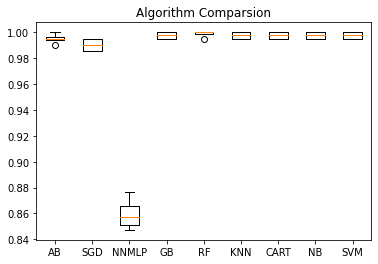

In [47]:
# evaluate each model in Turn
results = []
names = []
selectedName = ""
selectedModel = ""
largestAccuracy = 0
# kfold ?
# cek apakah X_train dan Y_train di pisah lagi

for name,model in models:
    kfold = StratifiedKFold(n_splits=4, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s : %f (%f)' % (name, cv_results.mean(), cv_results.std()))


    ## ??
    predictions = model.predict(X_validation_2)
    accuracy = accuracy_score(Y_validation_2, predictions)
    confuse_maker = confusion_matrix(Y_validation_2, predictions)
    raport = classification_report(Y_validation_2, predictions)

    print(accuracy)
    print(confuse_maker)
    print(raport)


# Comparison
pyplot.boxplot(results, labels = names)
pyplot.title('Algorithm Comparsion')
pyplot.show()





### Re-Input Dataset

In [48]:
url = "/home/jos/tf_lab/Ultralight-SimplePose/generator_dataset/dataset_file_5.csv"
data_title = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','res']

dataset = read_csv(url, names=data_title)
# Split-out validation dataset
array = dataset.values

X = array[:,[5,6,11,12,13,14,15,16]]
y = array[:,len(data_title)-1]
data_title = ['5','6','11','12','13','14','15','16','res']
X_train_2, X_validation_2, Y_train_2, Y_validation_2 = train_test_split(X, y, test_size=0.99)

In [49]:
print(X_train_2)

[[0.424756 0.308667 0.5379   0.333379 0.224773 0.34469  0.682949 0.584155]
 [0.5616   0.468567 0.3125   0.285984 0.463563 0.47947  0.673144 0.634597]
 [0.519688 0.482751 0.285784 0.342747 0.467512 0.454673 0.629085 0.673269]
 [0.484251 0.494309 0.129781 0.176826 0.402286 0.285399 0.788918 0.833522]
 [0.390706 0.250241 0.559628 0.48771  0.243445 0.367702 0.624489 0.667204]
 [0.604008 0.575903 0.109222 0.109222 0.425547 0.451106 0.853794 0.853794]
 [0.426539 0.317797 0.532732 0.350361 0.197641 0.303954 0.627061 0.569654]
 [0.635778 0.569391 0.20313  0.07326  0.354674 0.383778 0.837407 0.851729]]


In [50]:
print(X_validation_2)

[[0.620072 0.546071 0.055229 ... 0.432214 0.831162 0.777855]
 [0.399864 0.317047 0.533191 ... 0.373755 0.660157 0.575421]
 [0.469043 0.499781 0.106585 ... 0.210714 0.735246 0.743495]
 ...
 [0.576711 0.470924 0.32784  ... 0.451091 0.655809 0.641306]
 [0.484848 0.524881 0.109114 ... 0.282797 0.797605 0.84393 ]
 [0.537423 0.483201 0.298361 ... 0.451413 0.595336 0.655648]]


In [51]:
print(Y_train_2)

[1. 1. 1. 3. 1. 2. 1. 2.]


In [52]:
print(Y_validation_2)

[2. 1. 3. 2. 3. 3. 3. 2. 1. 3. 2. 2. 3. 1. 2. 1. 1. 2. 3. 1. 2. 3. 3. 3.
 1. 3. 2. 1. 1. 3. 2. 1. 2. 3. 1. 2. 1. 2. 1. 2. 2. 2. 2. 1. 3. 2. 2. 2.
 2. 3. 3. 2. 1. 3. 3. 1. 3. 2. 1. 2. 3. 1. 3. 2. 2. 1. 3. 2. 3. 3. 2. 2.
 2. 3. 1. 1. 2. 3. 2. 2. 1. 3. 2. 1. 3. 3. 3. 1. 2. 2. 2. 2. 2. 1. 3. 1.
 2. 3. 2. 1. 3. 1. 3. 2. 1. 1. 2. 2. 1. 1. 2. 1. 2. 2. 2. 2. 2. 1. 1. 3.
 1. 1. 3. 2. 3. 1. 2. 2. 1. 1. 2. 1. 2. 3. 2. 3. 2. 3. 2. 2. 1. 2. 1. 1.
 3. 2. 1. 1. 1. 2. 1. 2. 2. 2. 2. 1. 2. 1. 1. 1. 3. 3. 1. 1. 2. 1. 1. 3.
 1. 3. 2. 1. 2. 1. 3. 2. 1. 1. 1. 3. 2. 2. 1. 1. 2. 1. 3. 1. 1. 3. 3. 2.
 3. 1. 3. 2. 1. 2. 1. 2. 2. 3. 3. 1. 1. 1. 1. 3. 2. 2. 2. 1. 2. 2. 2. 1.
 1. 1. 1. 1. 2. 3. 2. 1. 1. 1. 1. 2. 1. 1. 2. 1. 3. 2. 1. 1. 2. 2. 1. 3.
 3. 1. 2. 1. 2. 2. 3. 3. 3. 2. 3. 1. 1. 3. 2. 1. 3. 1. 2. 1. 2. 1. 3. 1.
 3. 1. 3. 3. 1. 2. 3. 2. 3. 3. 1. 1. 1. 2. 1. 2. 2. 3. 2. 3. 3. 1. 2. 3.
 2. 2. 3. 1. 3. 1. 2. 2. 3. 2. 3. 3. 1. 3. 1. 2. 1. 1. 1. 2. 1. 2. 3. 1.
 3. 3. 1. 3. 1. 2. 2. 1. 2. 1. 2. 2. 3. 1. 2. 3. 2.

In [53]:
print()
print('Prediction step')
for name, model in models:
    print()
    print('name = ',name)
    # model.fit(X_train, Y_train) ? 
    # optimized_parameters = model.get_params(deep=True)
    predictions = model.predict(X_validation_2)
    accuracy = accuracy_score(Y_validation_2, predictions)
    confuse_maker = confusion_matrix(Y_validation_2, predictions)
    raport = classification_report(Y_validation_2, predictions)

    print(accuracy)
    print(confuse_maker)
    print(raport)
    # print('optimized_parameters',optimized_parameters)


Prediction step

name =  AB
0.9975124378109452
[[296   0   0]
 [  0 308   0]
 [  2   0 198]]
              precision    recall  f1-score   support

         1.0       0.99      1.00      1.00       296
         2.0       1.00      1.00      1.00       308
         3.0       1.00      0.99      0.99       200

    accuracy                           1.00       804
   macro avg       1.00      1.00      1.00       804
weighted avg       1.00      1.00      1.00       804


name =  SGD
0.9950248756218906
[[296   0   0]
 [  0 306   2]
 [  0   2 198]]
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       296
         2.0       0.99      0.99      0.99       308
         3.0       0.99      0.99      0.99       200

    accuracy                           1.00       804
   macro avg       0.99      0.99      0.99       804
weighted avg       1.00      1.00      1.00       804


name =  NNMLP
0.8793532338308457
[[296   0   0]
 [  0 308   0]
 [

# ~~~~~~~~~~~~~~~~~~~

In [ ]:


n = len(data_title)-1;
currentlargestAccuracy_perReducedSize = largestAccuracy;
current_combinations_removedColumnIndex_Sets = list();
current_X_train = X_train.copy();
bestlargestAccuracy_perReducedSize = largestAccuracy;
best_combinations_removedColumnIndex_Sets = list();
best_X_train = X_train.copy();
initial_column_index = list(range(0,len(data_title)-1))
r = 1;
copy_of_data_title = data_title.copy();
for iteration in range(1, len(data_title)-1):

	largestAccuracy_sameReducedSize = 0;
	selectedSet_combinations_removedColumnIndex = list();
	
	# find combinations in a set (n_C_r)
	# start with the next largest number of input parameters = n-1
	# (if a better accuracy is obtained, then reduce the number of input parameters (from the current best combination), until the accuracy is not improved anymore, etc)
	# source code: https://www.baeldung.com/java-combinations-algorithm
	
	combinations_removedColumnIndex_Sets = list();
	combination = [None] * r
    # initialize with lowest lexicographic combination
	for i in range(0, r):
		combination[i] = i;
	
	while combination[r-1] < n:
		combinations_removedColumnIndex_Sets += [combination.copy()]
		
		# generate next combination in lexicographic order
		t = r - 1;
		while t != 0 and combination[t] == n - r + t:
			t -= 1;
		combination[t] += 1;
		for i in range(t+1, r):
			combination[i] = combination[i-1] + 1;
	
	kfold = StratifiedKFold(n_splits=10, random_state=random_value, shuffle=True)
	for i in range(0, len(combinations_removedColumnIndex_Sets)):

		random_seed = random.seed(random_value);

		print("i = ", i, "; len(combinations_removedColumnIndex_Sets) = ", len(combinations_removedColumnIndex_Sets));
		reduced_X_train = current_X_train.copy()
		reduced_X_train = np.delete(reduced_X_train,combinations_removedColumnIndex_Sets[i][0],1);

		# Retest accuracy with the reduced data
		cv_results = cross_val_score(model, reduced_X_train, Y_train, cv=kfold, scoring='accuracy')
		optimized_parameters = model.get_params(deep=True)
		results.append(cv_results)
		names.append(name)
		if (cv_results.mean() > largestAccuracy_sameReducedSize):
			largestAccuracy_sameReducedSize = cv_results.mean();
			selectedSet_combinations_removedColumnIndex = i;

	currentlargestAccuracy_perReducedSize = largestAccuracy_sameReducedSize;
	current_X_train = np.delete(current_X_train,combinations_removedColumnIndex_Sets[selectedSet_combinations_removedColumnIndex][0],1);
	current_combinations_removedColumnIndex_Sets += [initial_column_index[combinations_removedColumnIndex_Sets[selectedSet_combinations_removedColumnIndex][0]]];
	del initial_column_index[combinations_removedColumnIndex_Sets[selectedSet_combinations_removedColumnIndex][0]];
	del copy_of_data_title[combinations_removedColumnIndex_Sets[selectedSet_combinations_removedColumnIndex][0]];
	print("currentlargestAccuracy_perReducedSize, data_title: ", currentlargestAccuracy_perReducedSize, "; ", copy_of_data_title, "(", initial_column_index, ")");
	n -= 1;

	if largestAccuracy_sameReducedSize >= bestlargestAccuracy_perReducedSize:
		bestlargestAccuracy_perReducedSize = currentlargestAccuracy_perReducedSize;
		best_X_train = current_X_train.copy();
		best_combinations_removedColumnIndex_Sets = current_combinations_removedColumnIndex_Sets.copy();
		data_title = copy_of_data_title.copy();

In [ ]:

# Obtain input data combination with the best accuracy
best_combinations_removedColumnIndex_Sets.sort();
X_train = best_X_train.copy()
for j in range(len(best_combinations_removedColumnIndex_Sets)-1,-1,-1):
	X_validation = np.delete(X_validation,best_combinations_removedColumnIndex_Sets[j],1);

# Retrain model (using important input data)
kfold = StratifiedKFold(n_splits=10, random_state=random_value, shuffle=True);
cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy');
optimized_parameters = model.get_params(deep=True);
results.append(cv_results);
names.append(name);
print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()));
print();

print("data_title:");
print(data_title);
print();

print()
print('Prediction step')
# Make predictions on validation dataset
print()
print('selectedName = ',selectedName)
selectedModel.fit(X_train, Y_train)
predictions = selectedModel.predict(X_validation)


# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
